# Simulation et Monte Carlo - Projet final
Marches aléatoires autosécantes
## 1 - Simulation de trajectoires en dimension 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def dimension_2_random_walk(X):
    U = np.random.choice([1,2,3,4])
    if U == 1:
        X[0] += 1
    elif U == 2:
        X[0] -= 1
    elif U == 3:
        X[1] += 1
    else:
        X[1] -= 1

In [ ]:
n = 10000
X = [0,0]
trajectoire = []
trajectoire.append(tuple(X))
longueurs = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:    
    dimension_2_random_walk(X)

    if tuple(X) in trajectoire:
        longueurs.append(longueur)
        nbr_sections += 1
        longueur = 0
    else:
        longueur += 1
    
    trajectoire.append(tuple(X))

In [ ]:
x = list()
y = list()

for i in range(len(trajectoire)):
    x.append(trajectoire[i][0])
    y.append(trajectoire[i][1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1.plot(x,y)
ax2 = sns.distplot(np.array(longueurs)[np.where(np.array(longueurs)>0)], kde=False)
plt.show()

## 2 - Modification de la simulation en dimension d

In [46]:
import numpy as np
import copy

def random_walk_n_dimensions(d,k,nbriter):

    ''' Retourne une liste de d'arrays d'arrays. Chaque élément de la grosse liste est une trajectoire simulée par la méthode de la question 2 '''

    ''' On veut une liste de trajectoires. Cette chaque trajectoire est une liste d'arrays. Chaque array est de dimension (d,1) . On va donc créer chaque début de trajectoire, qui sera un état de dimension d. Ainsi au départ, trajectoires sera une liste de listes qui contiennent chacune 1 array de dimension d et remplis de 0.'''

    ''' Il suffit donc de créer la première trajectoire, liste qui contient un array de dimension d et ne contient que des 0, et de faire * N.'''

    N = 2*d*k

    trajectoires = []

    trajectoires.append([])
    trajectoires[0].append(np.zeros(d))
    trajectoires *= N

    for z in range(nbriter):

        ''' On va ensuite rajouter une etape à chaque trajectoire. Pour obtenir l'ensemble des etapes à un temps donné, on va donc d'abord tirer des directions comme décrit dans l'énoncé, puis les rajouter aléatoirement à chaque étape.'''

        ''' Les directions : il faut une liste de 2 * d * k arrays '''

        ''' On commence par les directions positives, une liste de d*k arrays '''

        directions_positives = []
        for i in range(d):
            directions_positives.append(np.zeros(d))
            directions_positives[i][i] = 1

        directions_positives *= k

        ''' Puis on fait les directions négatives '''
        directions_negatives = []
        for i in range(d):
            directions_negatives.append(np.zeros(d))
            directions_negatives[i][i] = -1

        directions_negatives *= k

        ''' On concatène '''

        directions = directions_positives + directions_negatives

        ''' Et on mélange '''
        directions = list(np.random.permutation(np.array(directions)))

        ''' L'attribution des directions '''

        for i in range(N):
            copie = copy.deepcopy(trajectoires[i])
            copie.append(copie[-1]+directions[i])
            trajectoires[i] = copie
    
    for j in range(N):
        trajectoires[j] = np.array(trajectoires[j])

    return trajectoires

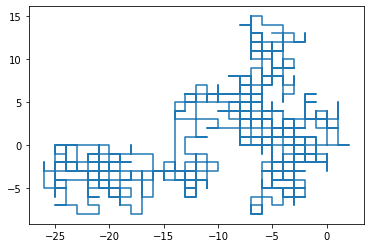

In [88]:
rwalk = random_walk_n_dimensions(2,2,1000)

import matplotlib.pyplot as plt

fig0, ax0 = plt.subplots()

ax0.plot(rwalk[0][:,1],rwalk[0][:,0])

plt.show()

In [126]:
import time
from tqdm import tqdm

def longueurs_n_dim(d,k,nbriter):
    rwalk = random_walk_n_dimensions(d,k,nbriter)
    longueurs = []
    for i in tqdm(range(2*d*k)):
        longueurs.append([])
        longueur = 0
        compteur = 1
        while compteur < nbriter+1:
            while rwalk[i][compteur] not in rwalk[0][:(compteur - 1)]:
                longueur+=1
                compteur+=1
            copieliste = copy.deepcopy(longueurs[i])
            copieliste.append(copy.deepcopy(longueur))
            longueurs[i] = copieliste
            longueur = 0
    time.sleep(4)
    return longueurs

In [ ]:
longueurs(1,1,5)